# **Yefferson Camilo Luna Moreno**
**Parcial #2 Procesamiento de Imagenes**


In [ ]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

def load_image(path_image):
    img = cv2.imread("/content/colors.jpg")
    return img[...,::-1] 

img =  cv2.imread("/content/colors.jpg")

In [ ]:
def contorno (mascara,contornocolor):
  return cv2.drawContours(mascara,contornocolor,-1,(0,255,0),10)

In [ ]:
def ContandoContornos (z):
  gauss = cv2.GaussianBlur(z, (5,5), 0)
  canny = cv2.Canny(gauss, 450,905)
  contornos = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
  return ((len(contornos)))

In [ ]:
#amarillo
yellowBajo1 = np.array([20, 100, 20], np.uint8)
yellowAlto1 = np.array([32, 255, 255], np.uint8)

#verde
greenBajo1 = np.array([45, 0, 20], np.uint8)
greenAlto1 = np.array([80, 255, 255], np.uint8)

#morado
purple1 = np.array([124, 80, 10], np.uint8)
purpleAlto = np.array([150, 255, 255], np.uint8)


In [ ]:
frameHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

maskgreen = cv2.inRange(frameHSV,greenBajo1,greenAlto1)
maskgreenvis = cv2.bitwise_and(load_image(img),load_image(img),mask=maskgreen)

maskyellow = cv2.inRange(frameHSV, yellowBajo1,yellowAlto1)
maskyellowvis = cv2.bitwise_and(load_image(img),load_image(img),mask=maskyellow)

maskpurple = cv2.inRange(frameHSV, purple1,purpleAlto)
maskpurplevis = cv2.bitwise_and(img,img,mask=maskpurple)

contornosAmarillo = cv2.findContours(maskyellow, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contornosVioleta = cv2.findContours(maskpurple, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contornosVerde = cv2.findContours(maskgreen, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

In [ ]:
Numero_Violeta =ContandoContornos(contorno(maskpurple,contornosVioleta))
Numero_Verdes=ContandoContornos(contorno(maskgreen,contornosVerde))
Numero_Amarillas=ContandoContornos(contorno(maskyellow,contornosAmarillo))

Text(0.5, 1.0, 'Moradas: 6')

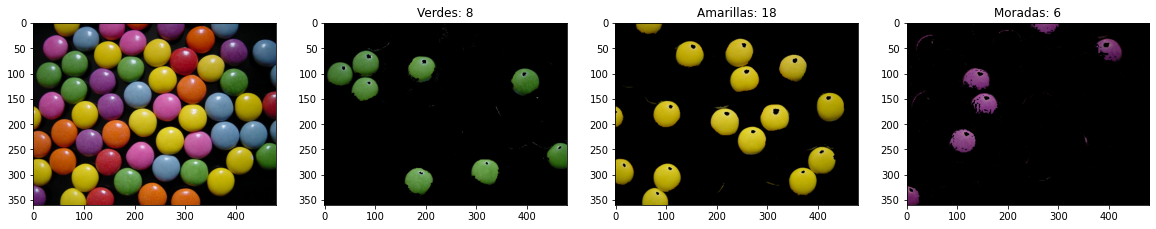

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20,5))
axs[0].imshow(load_image(img))
axs[1].imshow(maskgreenvis )
axs[1].set_title('Verdes: '+ str(Numero_Verdes))
axs[2].imshow(maskyellowvis )
axs[2].set_title('Amarillas: '+ str(Numero_Amarillas))
axs[3].imshow(maskpurplevis )
axs[3].set_title('Moradas: '+ str(Numero_Violeta))